In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import random
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/Dataset/Rumah Adat'

import os
os.chdir(folder_path)

!pwd

/content/drive/MyDrive/Dataset/Rumah Adat


In [ ]:
# Membuat ImageDataGenerator dengan preprocessing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.30  # 30% untuk validasi
)

# Membuat generator untuk training data
train_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Membuat generator untuk validation data
val_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Membagi sebagian data validasi menjadi data testing
X_test1, y_test1 = val_generator[0]
X_test2, y_test2 = val_generator[1]
X_test3, y_test3 = val_generator[2]
X_test4, y_test4 = val_generator[3]

# Menggabungkan batch-batch untuk data testing
X_test = np.concatenate([X_test1, X_test2, X_test3, X_test4], axis=0)
y_test = np.concatenate([y_test1, y_test2, y_test3, y_test4], axis=0)

# Mengurangi jumlah sampel pada validation generator
val_generator.samples -= len(X_test)

# Menampilkan informasi dataset
print(f"Jumlah data untuk training: {train_generator.samples}")
print(f"Jumlah data untuk validasi: {val_generator.samples}")
print(f"Jumlah data untuk testing: {len(X_test)}")


Found 7036 images belonging to 5 classes.
Found 3012 images belonging to 5 classes.
Jumlah data untuk training: 7036
Jumlah data untuk validasi: 2884
Jumlah data untuk testing: 128


In [ ]:
# Jumlah Data Test
print(len(X_test))

128


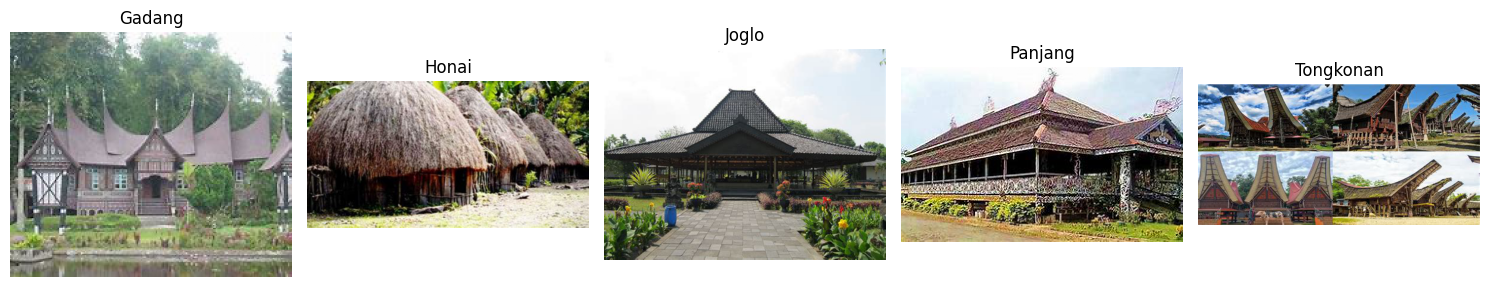

In [ ]:
gadang_img = plt.imread("/content/drive/MyDrive/Dataset/Rumah Adat/gadang/1 (1).png")
honai_img = plt.imread("/content/drive/MyDrive/Dataset/Rumah Adat/honai/1 (1).png")
joglo_img = plt.imread("/content/drive/MyDrive/Dataset/Rumah Adat/joglo/1 (1).png")
panjang_img = plt.imread("/content/drive/MyDrive/Dataset/Rumah Adat/panjang/1 (1).png")
tongkonan_img = plt.imread("/content/drive/MyDrive/Dataset/Rumah Adat/tongkonan/1 (1).png")

# Menampilkan gambar dalam satu plot
plt.figure(figsize=(15, 5))

plt.subplot(151)
plt.imshow(gadang_img)
plt.title("Gadang")
plt.axis("off")

plt.subplot(152)
plt.imshow(honai_img)
plt.title("Honai")
plt.axis("off")

plt.subplot(153)
plt.imshow(joglo_img)
plt.title("Joglo")
plt.axis("off")

plt.subplot(154)
plt.imshow(panjang_img)
plt.title("Panjang")
plt.axis("off")

plt.subplot(155)
plt.imshow(tongkonan_img)
plt.title("Tongkonan")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Pembuatan Model CNN
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,236,389 (12.35 MB)

 Trainable params: 3,236,389 (12.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Setting Hyper Parameter
lr = 0.001
max_epoch = 10
opt_func = Adam(learning_rate=lr)

model.compile(optimizer=opt_func,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Tempat menyimpan model terbaik
model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Dataset/model_best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=max_epoch, callbacks=[model_checkpoint])

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.8800 - loss: 0.7655
Epoch 1: val_accuracy improved from -inf to 0.93625, saving model to /content/drive/MyDrive/Dataset/model_best.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 212s 955ms/step - accuracy: 0.8800 - loss: 0.7654 - val_accuracy: 0.9363 - val_loss: 0.6129
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.8983 - loss: 0.6815
Epoch 2: val_accuracy did not improve from 0.93625
220/220 ━━━━━━━━━━━━━━━━━━━━ 208s 934ms/step - accuracy: 0.8983 - loss: 0.6816 - val_accuracy: 0.9190 - val_loss: 0.6913
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.9082 - loss: 0.6723
Epoch 3: val_accuracy improved from 0.93625 to 0.94622, saving model to /content/drive/MyDrive/Dataset/model_best.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 210s 944ms/step - accuracy: 0.9082 - loss: 0.6724 - val_accuracy: 0.9462 - val_loss: 0.5842
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.9180 - loss: 0.65

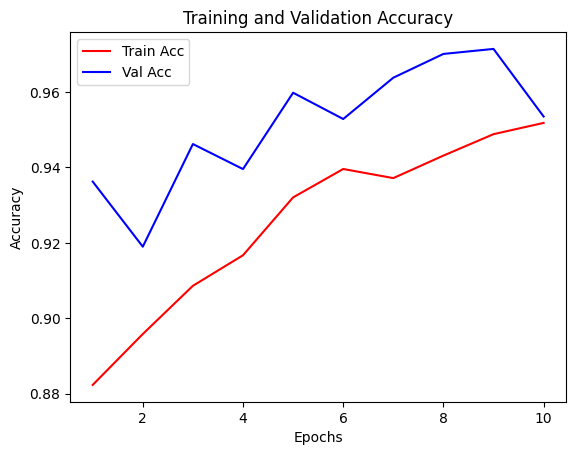

In [ ]:
# Dapatkan riwayat akurasi pelatihan dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot akurasi pelatihan dan validasi
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Train Acc')
plt.plot(epochs, val_accuracy, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

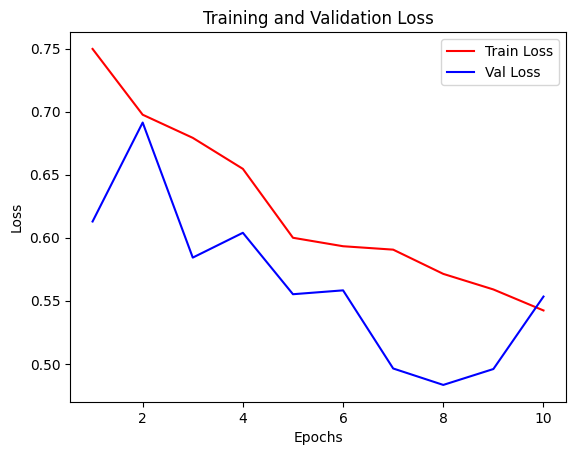

In [33]:
# Dapatkan riwayat loss pelatihan dan validasi
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss pelatihan dan validasi
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
best_model = keras.models.load_model('/content/drive/MyDrive/Dataset/model_best.keras')

In [ ]:
y_pred = best_model.predict(X_test)
y_true = np.argmax(y_test, axis=1)

class_names = sorted(train_generator.class_indices.keys())

print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
              precision    recall  f1-score   support

      gadang       1.00      1.00      1.00        21
       honai       0.86      1.00      0.92        30
       joglo       1.00      0.83      0.91        18
     panjang       0.97      0.94      0.96        34
   tongkonan       0.96      0.92      0.94        25

    accuracy                           0.95       128
   macro avg       0.96      0.94      0.95       128
weighted avg       0.95      0.95      0.95       128



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


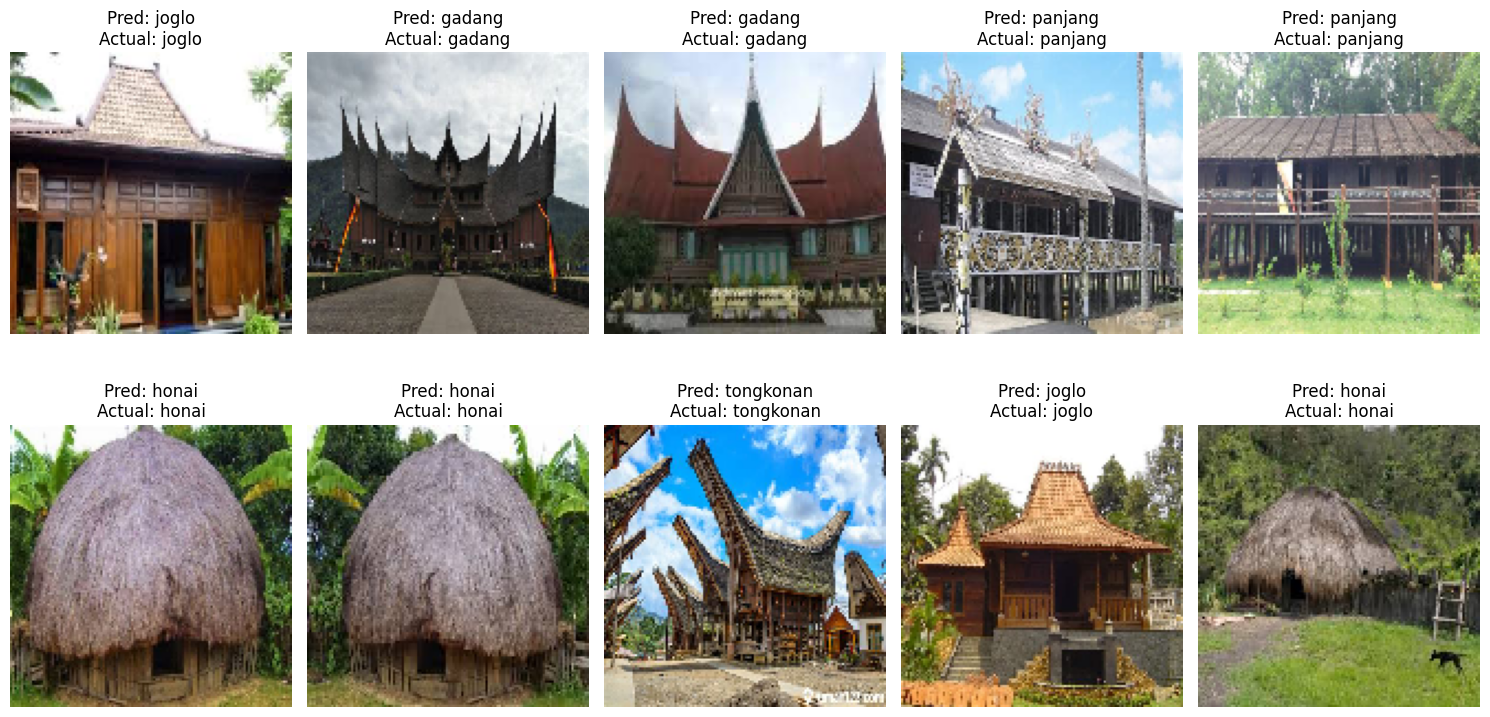

In [ ]:
# Ambil 10 indeks gambar secara acak
random_indices = random.sample(range(len(X_test)), 10)
X_sample = X_test[random_indices]
y_sample = y_true[random_indices]

# Prediksi 10 gambar
y_pred_sample = model.predict(X_sample)

# Menampilkan gambar dan hasil prediksi
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_sample[i])  # Menampilkan gambar
    true_class = class_names[y_sample[i]]
    predicted_class = class_names[np.argmax(y_pred_sample[i])]
    plt.title(f"Pred: {predicted_class}\nActual: {true_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()
